# ROC (Receiver Operating Characteristic) Curve

---

## 분류 모델 성능 평가

- 분류 모델 성능 시각화에 널리 사용


---

## ROC 곡선 해석

- 가로축: False Positive Rate
- 세로축: True Positive Rate  
- 왼쪽 상단에 가까울수록 모델 성능 좋음
- 대각선에 가까우면 무작위 예측 수준

---

## True Positive Rate vs False Positive Rate 

- True Positive Rate: 실제 긍정을 긍정으로 예측한 비율
- False Positive Rate: 실제 부정을 긍정으로 잘못 예측한 비율
- 상충 관계 시각화

---

## AUC (Area Under the Curve)

- ROC 곡선 아래 면적 (0 ~ 1)
- 1에 가까울수록 모델 성능 우수
- 0.5는 무작위 예측과 동일

---  

## 임계값 조정

- False Positive와 True Positive 사이의 균형 조절 가능
    - threshold(클래스를 예측할 때 사용하는 결정 임계값)이 변화함에 따라 FPR과 TPR이 어떻게 변화하는지를 시각화. 어떤 threshold 값에서 모델의 성능이 좋은지를 파악할 수 있다.
- 예: 스팸 메일 탐지. FP 줄이기 위해 임계값 높이면 TP도 낮아짐.
  - trade off를 roc 곡선을 통해 시각화하고 조정할 수 있다.
  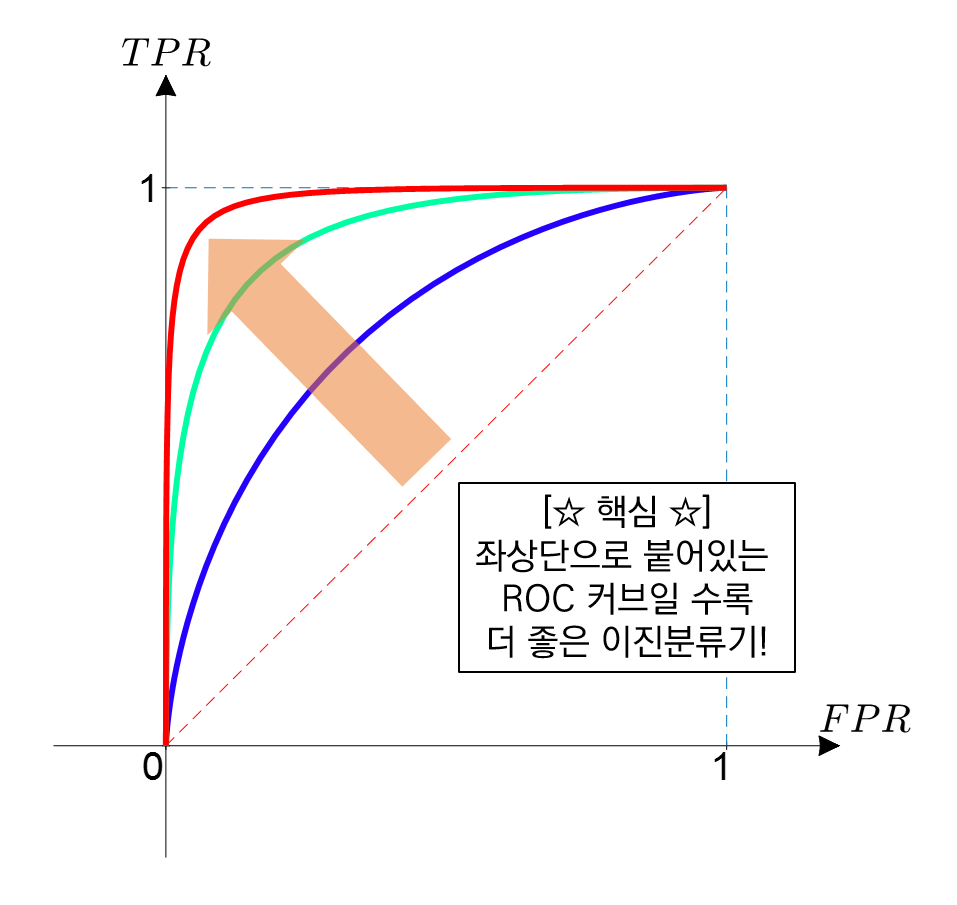

발표 대본: 

ROC(Receiver Operating Characteristic) 곡선에 대해 자세히 알아보겠습니다. ROC 곡선은 분류 모델의 성능을 시각화하는 데 널리 사용됩니다.

이 곡선은 True Positive Rate와 False Positive Rate 사이의 **상충 관계**를 보여줍니다. True Positive Rate는 실제 긍정 케이스를 긍정으로 올바르게 예측한 비율을 말합니다. 반면 False Positive Rate는 실제 부정 케이스를 긍정으로 잘못 예측한 비율입니다.

ROC 곡선의 가로축은 False Positive Rate, 세로축은 True Positive Rate로 표시됩니다. 곡선이 왼쪽 상단 모서리에 가까울수록 모델의 성능이 좋다는 것을 의미합니다. 반대로 곡선이 대각선에 가까울수록 모델이 무작위로 예측하는 것과 비슷해집니다.

ROC 곡선에서 중요한 지표 중 하나는 AUC(Area Under the Curve)입니다. 이는 곡선 아래 면적을 나타내며, 0과 1 사이의 값을 갖습니다. AUC 값이 1에 가까울수록 모델의 성능이 우수하다고 볼 수 있습니다. 0.5의 AUC 값은 무작위 예측과 동일한 수준입니다.

ROC 곡선을 활용하면 분류 모델의 임계값을 조정하여 False Positive와 True Positive 사이에서 적절한 균형을 찾을 수 있습니다. 예를 들어 스팸 메일 탐지 모델에서 False Positive(정상 메일을 스팸으로 잘못 분류)를 줄이기 위해 임계값을 높일 수 있지만, 그렇게 되면 True Positive(실제 스팸 메일 탐지율)도 낮아질 수 있습니다. 이러한 트레이드오프를 ROC 곡선을 통해 시각화하고 조정할 수 있습니다.

ROC 곡선은 이진 분류 문제뿐만 아니라 다중 클래스 분류에서도 활용할 수 있습니다. 다중 클래스의 경우 One-vs-Rest 전략을 사용하여 각 클래스에 대한 ROC 곡선을 그린 다음, 평균을 내거나 가중치를 적용하여 종합적인 ROC 곡선을 얻을 수 있습니다.

요약하자면, ROC 곡선은 분류 모델의 성능을 시각화하고 평가하는 데 유용한 도구입니다. 이 곡선을 통해 False Positive Rate와 True Positive Rate 사이의 균형을 파악하고, AUC 값으로 모델 전체의 성능을 판단할 수 있습니다. 따라서 기계 학습 모델 개발 과정에서 ROC 곡선 분석은 필수적입니다.



## 요약

- 시각화를 통해 모델 성능 평가 
- FPR과 TPR 사이의 균형 파악
- AUC로 전체 성능 판단
- 모델 개발 과정에서 필수적인 분석 도구

In [10]:
import pandas as pd
from sklearn import datasets

# 유방암 데이터셋 로드
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)

# 1이면 양성 종양, 0이면 악성 종양 라벨 컬럼 지정
df['target'] = data.target

In [11]:
from sklearn.model_selection import train_test_split

# train, test 셋 분리
X = df.iloc[:, :-1] # target column을 제외한 모든 column을 feature로 사용
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_score = model.predict(X_test) # 테스트 데이터셋에 대한 예측 값

# 앞 5개 값 출력 예시
print(y_score[:5])

[0.62168355 0.17803853 0.27512068 1.1320503  1.11698318]


## 1. roc curve 계산

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

## 2. roc curve 시각화

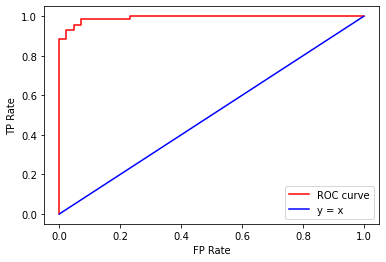

In [16]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.legend() # 그래프 라벨 표시

plt.show()

## 3. AUC 면적 계산

In [17]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_score)) # 0.985260399606944

0.9924664264657714


## 4. 최적의 threshold 탐색